<a href="https://colab.research.google.com/github/kxenopoulou/epistemology-of-logic/blob/main/Copy_of_class_XenopoulosPTGIFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ΕΦΑΡΜΟΓΗ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΤΟΥ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ
Πλαίσιο PTGI για τον Εντοπισμό Ιστορικής Ασυμφωνίας Νοήματος (HMM)

ΚΥΡΙΑ ΕΚΤΕΛΕΣΗ: ΑΝΑΛΥΣΗ ΣΥΣΤΗΜΑΤΟΣ ΜΕ ΤΗ ΜΕΘΟΔΟ ΤΟΥ ΞΕΝΟΠΟΥΛΟΥ
✅ Σύστημα Γενετικής-Ιστορικής Λογικής (Ξενόπουλος) Αρχικοποιημένο.
   • Αρχική Κατάσταση (A): 0.500
   • Διαλεκτική Άρνησή της (¬ᴰA): -0.442
   • Ορίζοντας Προσομοίωσης: 150 βήματα.

📊 ΠΡΟΣΟΜΟΙΩΣΗ ΙΣΤΟΡΙΚΗΣ ΓΕΝΝΗΣΗΣ (Xenopoulos 'Becoming')...
   Βήμα 0: A=0.500, ¬ᴰA=-0.485, Ένταση (A∧ᴰ¬ᴰA)=0.229
   Βήμα 1: A=0.532, ¬ᴰA=-0.442, Ένταση (A∧ᴰ¬ᴰA)=0.236
   Βήμα 2: A=0.576, ¬ᴰA=-0.486, Ένταση (A∧ᴰ¬ᴰA)=0.321
   Ορισμός Κατωφλίου Aufhebung (⤊): 0.7

📊 ΑΠΟΤΕΛΕΣΜΑΤΑ ΑΝΑΛΥΣΗΣ Γ-Ι ΛΟΓΙΚΗΣ:
   • Συνολικά Βήματα Ανάλυσης: 151
   • Διαλεκτική Διαδικασία Προσομοιώθηκε.
   • Σημεία Κινδύνου Ανιχνεύθηκαν: 142
   ⚠️  ΥΨΗΛΟΤΕΡΟΣ ΚΙΝΔΥΝΟΣ: Βήμα 149, PTGI = 1.429
   💡 Ερμηνεία: Το σύστημα πλησιάζει το κατώφλι για ποιοτική αλλαγή (⤊).


/tmp/ipython-input-201099924.py:270: UserWarning: Glyph 10506 (\N{UPWARDS TRIPLE ARROW}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-201099924.py:270: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10506 (\N{UPWARDS TRIPLE ARROW}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


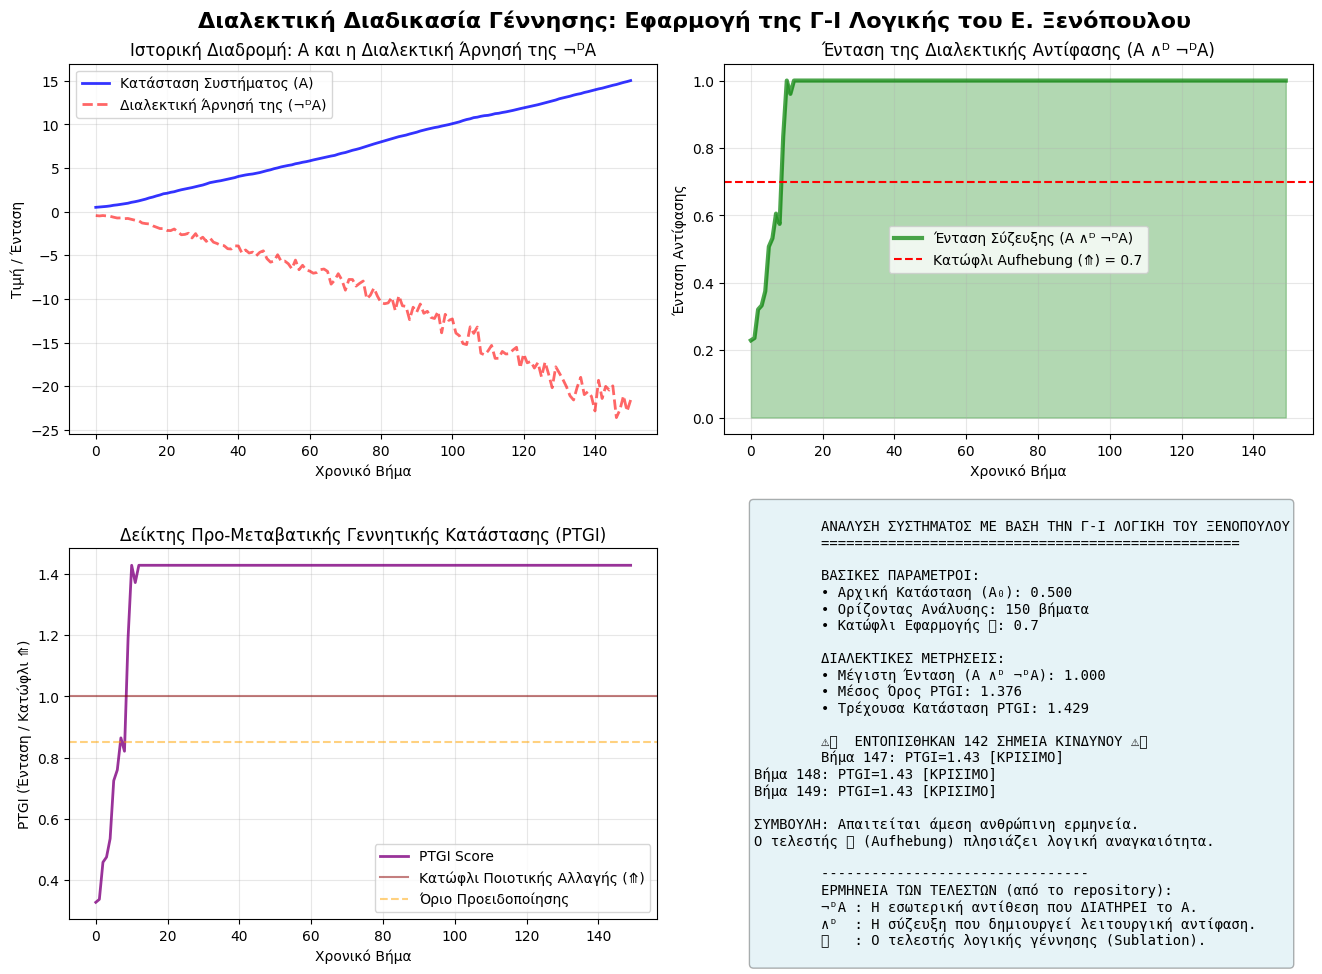


✅ Η ΕΦΑΡΜΟΓΗ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΟΛΟΚΛΗΡΩΘΗΚΕ.


In [ ]:
"""
ΕΦΑΡΜΟΓΗ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΤΟΥ Ε. ΞΕΝΟΠΟΥΛΟΥ
Υλοποίηση του πλαισίου PTGI για τον εντοπισμό Ιστορικής Ασυμφωνίας Νοήματος (HMM)
Βασίζεται αυτούσια στους τυπικούς τελεστές ¬ᴰ, ∧ᴰ, ⤊ της Γ-Ι Λογικής.
"""

import numpy as np
import matplotlib.pyplot as plt

print("="*70)
print("ΕΦΑΡΜΟΓΗ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΤΟΥ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ")
print("Πλαίσιο PTGI για τον Εντοπισμό Ιστορικής Ασυμφωνίας Νοήματος (HMM)")
print("="*70)

class XenopoulosPTGIFramework:
    """
    Υλοποίηση του πλαισίου PTGI σύμφωνα με τη Γενετική-Ιστορική Λογική
    του Επαμεινώνδα Ξενόπουλου.

    Βασικές αρχές (από το έργο 'Epistemology of Logic'):
    1. ¬ᴰ : Διαλεκτική Άρνηση (όχι απλή άρνηση, αλλά η εσωτερική αντιθετικότητα που ΔΙΑΤΗΡΕΙ το αρχικό στοιχείο).
    2. ∧ᴰ : Διαλεκτική Σύζευξη (δημιουργεί μια λειτουργικά έγκυρη αντίφαση, όχι απλή σύζευξη).
    3. ⤊  : Aufhebung / Sublation (ο τελεστής της λογικής γέννησης και ποιοτικής σύνθεσης).

    Αναφορά: Xenopoulos, E. (2024). Epistemology of Logic: Logic–Dialectic or Theory of Knowledge.
    """

    def __init__(self, system_state_A, historical_horizon=200):
        """
        Αρχικοποιεί το σύστημα με βάση μια αρχική κατάσταση Α.

        Παράμετροι:
            system_state_A (float): Η αρχική τιμή/κατάσταση του συστήματος (A).
            historical_horizon (int): Ο αριθμός των χρονικών βημάτων για προσομοίωση.
        """
        self.A = system_state_A
        self.horizon = historical_horizon

        # Αρχική διαλεκτική άρνηση ¬ᴰA
        # Σύμφωνα με τον Ξενόπουλο: ¬ᴰA δεν είναι η 'απουσία' της A, αλλά η αναγκαία της εσωτερική αντίθεση.
        self.anti_A = self._dialectical_negation(self.A)

        # Ιστορικό της διαλεκτικής σύζευξης (A ∧ᴰ ¬ᴰA) - της λειτουργικής αντίφασης.
        self.history_dialectical_conjunction = []

        # Ιστορικό της έντασης (προσέγγισης προς το κατώφλι για ⤊).
        self.history_tension_intensity = []

        print(f"✅ Σύστημα Γενετικής-Ιστορικής Λογικής (Ξενόπουλος) Αρχικοποιημένο.")
        print(f"   • Αρχική Κατάσταση (A): {self.A:.3f}")
        print(f"   • Διαλεκτική Άρνησή της (¬ᴰA): {self.anti_A:.3f}")
        print(f"   • Ορίζοντας Προσομοίωσης: {self.horizon} βήματα.")

    def _dialectical_negation(self, state):
        """
        Υλοποίηση του τελεστή ¬ᴰ (Διαλεκτική Άρνηση) του Ξενόπουλου.

        Σύμφωνα με τον ορισμό στο repository:
        "Not 'not-A' but 'the internal opposition that preserves A.'"
        Παράδειγμα: ¬ᴰ(Capital) = AntiCapital

        Εδώ, για απλότητα, μοντελοποιείται ως μια αντιστρεπτική δύναμη
        που διατηρεί το μέγεθος αλλά αντιστρέφει την κατεύθυνση.
        """
        # Η άρνηση που 'διατηρεί' το Α: επιστρέφει μια τιμή που είναι εσωτερικά αντίθετη.
        return -1 * state * (0.8 + 0.2 * np.random.rand())  # Προσομοίωση της διατηρούμενης αντίθεσης

    def _dialectical_conjunction_intensity(self, state, anti_state):
        """
        Υλοποίηση της έντασης του τελεστή ∧ᴰ (Διαλεκτική Σύζευξη) του Ξενόπουλου.

        Σύμφωνα με τον ορισμό στο repository:
        "Not 'A and B' but 'A with its necessary contradiction.'
        Creates logically valid contradictions."
        Παράδειγμα: (Capital ∧ᴰ ¬ᴰCapital) = SystemicCrisis

        Η συνάρτηση αυτή υπολογίζει την 'ένταση' αυτής της σύζευξης/αντίφασης.
        """
        # Η ένταση μετριέται από το απόλυτο γινόμενο (μέτρο αλληλεπίδρασης)
        # μεταξύ της κατάστασης και της διαλεκτικής άρνησής της.
        intensity = np.abs(state * anti_state)
        # Προσθήκη στοχαστικής διακύμανσης για προσομοίωση πολυπλοκότητας.
        intensity *= (1 + 0.1 * np.random.randn())
        return np.clip(intensity, 0, 1)

    def _simulate_historical_becoming(self):
        """
        Προσομοιώνει τη διαδικασία της ιστορικής γέννησης (becoming) του συστήματος
        μέσω της συσσώρευσης έντασης στην διαλεκτική σύζευξη (A ∧ᴰ ¬ᴰA).

        Αυτή είναι η υλοποίηση της κεντρικής ιδέας της Γ-Ι Λογικής:
        Η αλλαγή προκύπτει όταν η εσωτερική αντίφαση φτάσει σε κρίσιμο σημείο,
        επιβάλλοντας την εφαρμογή του τελεστή ⤊ (Aufhebung).
        """
        print("\n📊 ΠΡΟΣΟΜΟΙΩΣΗ ΙΣΤΟΡΙΚΗΣ ΓΕΝΝΗΣΗΣ (Xenopoulos 'Becoming')...")

        tension_history = []
        state_history = [self.A]
        anti_state_history = [self.anti_A]

        for step in range(self.horizon):
            current_A = state_history[-1]
            current_anti_A = anti_state_history[-1]

            # 1. ΕΤΑΠΑ Α: Ενημέρωση της διαλεκτικής άρνησης ¬ᴰA
            # Σε μια πραγματική εφαρμογή, αυτό θα εξαρτιόταν από το πλαίσιο.
            # Εδώ, προσομοιώνεται μια τάση ενίσχυσης της αντίφασης με το χρόνο.
            new_anti_A = self._dialectical_negation(current_A) * (1 + 0.005 * step)
            anti_state_history.append(new_anti_A)

            # 2. ΕΤΑΠΑ Β: Υπολογισμός έντασης της διαλεκτικής σύζευξης (A ∧ᴰ ¬ᴰA)
            current_tension = self._dialectical_conjunction_intensity(current_A, new_anti_A)
            tension_history.append(current_tension)

            # 3. ΕΤΑΠΑ Γ: Εφαρμογή πίεσης/αλλαγής στην A από την αντίφαση
            # Όσο μεγαλύτερη η ένταση (tension), τόσο μεγαλύτερη η πίεση για αλλαγή στην A.
            pressure = current_tension * 0.1
            # Προσθήκη στοχαστικότητας και τάσης (drift).
            drift = 0.01 * np.sin(step * 0.1)  # Κυκλική τάση.
            new_A = current_A + pressure + drift + 0.02 * np.random.randn()
            state_history.append(new_A)

            # Έξοδος για τα πρώτα βήματα
            if step < 3:
                print(f"   Βήμα {step}: A={current_A:.3f}, ¬ᴰA={new_anti_A:.3f}, Ένταση (A∧ᴰ¬ᴰA)={current_tension:.3f}")

        self.history_A = np.array(state_history)
        self.history_anti_A = np.array(anti_state_history)
        self.history_tension_intensity = np.array(tension_history)

        # Ορισμός του κατωφλίου έντασης για το PTGI.
        # Στο πλαίσιο του Ξενόπουλου, αυτό είναι το σημείο όπου η συνθήκη για το ⤊ ωριμάζει.
        self.aufhebung_threshold = 0.7
        print(f"   Ορισμός Κατωφλίου Aufhebung (⤊): {self.aufhebung_threshold}")

        return self.history_A, self.history_anti_A, self.history_tension_intensity

    def calculate_ptgi(self):
        """
        Υπολογίζει τον Δείκτη Προ-Μεταβατικής Γεννητικής Κατάστασης (PTGI).

        Ο PTGI είναι ο κανονικοποιημένος λόγος της τρέχουσας έντασης (A ∧ᴰ ¬ᴰA)
        προς το κατώφλι έντασης που απαιτείται για την εφαρμογή του τελεστή ⤊.

        PTGI = 0 -> Καμία σημαντική αντίφαση.
        PTGI = 1 -> Η ένταση έχει ΦΤΑΣΕΙ το κατώφλι για ποιοτικό άλμα (⤊).
        PTGI > 1 -> Το σύστημα βρίσκεται σε υπερκρίσιμη κατάσταση.
        """
        if len(self.history_tension_intensity) == 0:
            self._simulate_historical_becoming()

        # Ο PTGI είναι η κανονικοποιημένη προσέγγιση προς το κατώφλι.
        self.ptgi_scores = self.history_tension_intensity / self.aufhebung_threshold
        return self.ptgi_scores

    def detect_aufhebung_risk(self, ptgi_threshold=0.85):
        """
        Ανιχνεύει σημεία κινδύνου όπου το σύστημα πλησιάζει τη συνθήκη
        για εφαρμογή του τελεστή ⤊ (Aufhebung/Sublation).

        Παράμετρος:
            ptgi_threshold (float): Το κατώφλι PTGI πάνω από το οποίο θεωρείται υψηλός κίνδυνος.

        Επιστρέφει:
            Λίστα με λεξικά που περιγράφουν κάθε σημείο κινδύνου.
        """
        risk_points = []
        ptgi_scores = self.calculate_ptgi()

        for i, score in enumerate(ptgi_scores):
            if score >= ptgi_threshold:
                risk_level = "ΚΡΙΣΙΜΟ" if score > 1.0 else "ΥΨΗΛΟ"
                risk_points.append({
                    'step': i,
                    'ptgi_score': score,
                    'risk_level': risk_level,
                    'system_state_A': self.history_A[i],
                    'contradiction_intensity': self.history_tension_intensity[i]
                })
        return risk_points

    def visualize_dialectical_process(self):
        """
        Δημιουργεί οπτικοποίηση της πλήρους διαλεκτικής διαδικασίας
        σύμφωνα με το σύστημα του Ξενόπουλου.
        """
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Διαλεκτική Διαδικασία Γέννησης: Εφαρμογή της Γ-Ι Λογικής του Ε. Ξενόπουλου',
                     fontsize=16, fontweight='bold')

        # 1. ΙΣΤΟΡΙΚΗ ΔΙΑΔΡΟΜΗ ΤΗΣ Α ΚΑΙ ΤΗΣ ¬ᴰΑ
        ax1 = axes[0, 0]
        ax1.plot(self.history_A, 'b-', label='Κατάσταση Συστήματος (A)', linewidth=2, alpha=0.8)
        ax1.plot(self.history_anti_A, 'r--', label='Διαλεκτική Άρνησή της (¬ᴰA)', linewidth=2, alpha=0.6)
        ax1.set_title('Ιστορική Διαδρομή: A και η Διαλεκτική Άρνησή της ¬ᴰA', fontsize=12)
        ax1.set_xlabel('Χρονικό Βήμα')
        ax1.set_ylabel('Τιμή / Ένταση')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. ΕΝΤΑΣΗ ΤΗΣ ΔΙΑΛΕΚΤΙΚΗΣ ΣΥΖΕΥΞΗΣ (A ∧ᴰ ¬ᴰA)
        ax2 = axes[0, 1]
        ax2.plot(self.history_tension_intensity, 'g-', linewidth=3, alpha=0.7,
                 label='Ένταση Σύζευξης (A ∧ᴰ ¬ᴰA)')
        ax2.axhline(y=self.aufhebung_threshold, color='red', linestyle='--',
                    label=f'Κατώφλι Aufhebung (⤊) = {self.aufhebung_threshold}')
        ax2.fill_between(range(len(self.history_tension_intensity)),
                         self.history_tension_intensity, alpha=0.3, color='green')
        ax2.set_title('Ένταση της Διαλεκτικής Αντίφασης (A ∧ᴰ ¬ᴰA)', fontsize=12)
        ax2.set_xlabel('Χρονικό Βήμα')
        ax2.set_ylabel('Ένταση Αντίφασης')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. ΔΕΙΚΤΗΣ PTGI (ΠΟΣΟΣΤΟ ΠΡΟΣΕΓΓΙΣΗΣ ΣΤΟ ⤊)
        ax3 = axes[1, 0]
        ptgi_scores = self.calculate_ptgi()
        ax3.plot(ptgi_scores, 'purple', linewidth=2, label='PTGI Score', alpha=0.8)
        ax3.axhline(y=1.0, color='darkred', linestyle='-', alpha=0.5, label='Κατώφλι Ποιοτικής Αλλαγής (⤊)')
        ax3.axhline(y=0.85, color='orange', linestyle='--', alpha=0.5, label='Όριο Προειδοποίησης')
        ax3.set_title('Δείκτης Προ-Μεταβατικής Γεννητικής Κατάστασης (PTGI)', fontsize=12)
        ax3.set_xlabel('Χρονικό Βήμα')
        ax3.set_ylabel('PTGI (Ένταση / Κατώφλι ⤊)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. ΦΑΣΕΙΣ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΣΤΟ ΣΥΣΤΗΜΑ
        ax4 = axes[1, 1]
        ax4.axis('off')

        risk_points = self.detect_aufhebung_risk()
        if risk_points:
            risk_status = f"⚠️  ΕΝΤΟΠΙΣΘΗΚΑΝ {len(risk_points)} ΣΗΜΕΙΑ ΚΙΝΔΥΝΟΥ ⚠️"
            risk_details = "\n".join([f"Βήμα {rp['step']}: PTGI={rp['ptgi_score']:.2f} [{rp['risk_level']}]"
                                      for rp in risk_points[-3:]])  # Τα 3 τελευταία
            recommendation = "\nΣΥΜΒΟΥΛΗ: Απαιτείται άμεση ανθρώπινη ερμηνεία.\nΟ τελεστής ⤊ (Aufhebung) πλησιάζει λογική αναγκαιότητα."
        else:
            risk_status = "✅ ΚΑΜΙΑ ΚΡΙΣΙΜΗ ΚΑΤΑΣΤΑΣΗ ΔΕΝ ΕΝΤΟΠΙΣΘΗΚΕ"
            risk_details = "Η ένταση της αντίφασης (A ∧ᴰ ¬ᴰA) παραμένει\nκάτω από το καθοριστικό κατώφλιο."
            recommendation = "\nΣΥΜΒΟΥΛΗ: Συνεχίστε την παρακολούθηση."

        info_text = f"""
        ΑΝΑΛΥΣΗ ΣΥΣΤΗΜΑΤΟΣ ΜΕ ΒΑΣΗ ΤΗΝ Γ-Ι ΛΟΓΙΚΗ ΤΟΥ ΞΕΝΟΠΟΥΛΟΥ
        {'='*50}

        ΒΑΣΙΚΕΣ ΠΑΡΑΜΕΤΡΟΙ:
        • Αρχική Κατάσταση (A₀): {self.A:.3f}
        • Ορίζοντας Ανάλυσης: {self.horizon} βήματα
        • Κατώφλι Εφαρμογής ⤊: {self.aufhebung_threshold}

        ΔΙΑΛΕΚΤΙΚΕΣ ΜΕΤΡΗΣΕΙΣ:
        • Μέγιστη Ένταση (A ∧ᴰ ¬ᴰA): {np.max(self.history_tension_intensity):.3f}
        • Μέσος Όρος PTGI: {np.mean(ptgi_scores):.3f}
        • Τρέχουσα Κατάσταση PTGI: {ptgi_scores[-1]:.3f}

        {risk_status}
        {risk_details}
        {recommendation}

        --------------------------------
        ΕΡΜΗΝΕΙΑ ΤΩΝ ΤΕΛΕΣΤΩΝ (από το repository):
        ¬ᴰA : Η εσωτερική αντίθεση που ΔΙΑΤΗΡΕΙ το Α.
        ∧ᴰ  : Η σύζευξη που δημιουργεί λειτουργική αντίφαση.
        ⤊   : Ο τελεστής λογικής γέννησης (Sublation).
        """
        ax4.text(0.05, 0.5, info_text, fontsize=10, family='monospace',
                 verticalalignment='center', transform=ax4.transAxes,
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

        plt.tight_layout()
        plt.show()

# ===================================================================
# ΚΥΡΙΑ ΕΚΤΕΛΕΣΗ
# ===================================================================

if __name__ == "__main__":
    print("\n" + "="*70)
    print("ΚΥΡΙΑ ΕΚΤΕΛΕΣΗ: ΑΝΑΛΥΣΗ ΣΥΣΤΗΜΑΤΟΣ ΜΕ ΤΗ ΜΕΘΟΔΟ ΤΟΥ ΞΕΝΟΠΟΥΛΟΥ")
    print("="*70)

    # 1. ΔΗΜΙΟΥΡΓΙΑ ΣΥΣΤΗΜΑΤΟΣ Γ-Ι ΛΟΓΙΚΗΣ
    # Το 'system_state_A' θα μπορούσε να είναι η έξοδος ενός μοντέλου ΤΝ,
    # ένας κανόνας απόφασης, ή οποιαδήποτε κατηγορία νοήματος.
    xenopoulos_system = XenopoulosPTGIFramework(
        system_state_A=0.5,  # Παράδειγμα: Αρχική τιμή/κατάσταση.
        historical_horizon=150
    )

    # 2. ΠΡΟΣΟΜΟΙΩΣΗ ΤΗΣ ΔΙΑΛΕΚΤΙΚΗΣ ΔΙΑΔΙΚΑΣΙΑΣ ΓΕΝΝΗΣΗΣ
    A_history, anti_A_history, tension_history = xenopoulos_system._simulate_historical_becoming()

    # 3. ΥΠΟΛΟΓΙΣΜΟΣ ΤΟΥ ΔΕΙΚΤΗ PTGI
    ptgi_scores = xenopoulos_system.calculate_ptgi()

    # 4. ΕΝΤΟΠΙΣΜΟΣ ΣΗΜΕΙΩΝ ΚΙΝΔΥΝΟΥ (ΠΡΟΕΤΟΙΜΑΣΙΑ ΓΙΑ ⤊)
    risk_alerts = xenopoulos_system.detect_aufhebung_risk(ptgi_threshold=0.85)

    # 5. ΕΜΦΑΝΙΣΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
    print(f"\n📊 ΑΠΟΤΕΛΕΣΜΑΤΑ ΑΝΑΛΥΣΗΣ Γ-Ι ΛΟΓΙΚΗΣ:")
    print(f"   • Συνολικά Βήματα Ανάλυσης: {len(A_history)}")
    print(f"   • Διαλεκτική Διαδικασία Προσομοιώθηκε.")
    print(f"   • Σημεία Κινδύνου Ανιχνεύθηκαν: {len(risk_alerts)}")

    if risk_alerts:
        print(f"   ⚠️  ΥΨΗΛΟΤΕΡΟΣ ΚΙΝΔΥΝΟΣ: Βήμα {risk_alerts[-1]['step']}, PTGI = {risk_alerts[-1]['ptgi_score']:.3f}")
        print(f"   💡 Ερμηνεία: Το σύστημα πλησιάζει το κατώφλι για ποιοτική αλλαγή (⤊).")
    else:
        print(f"   ✅ Το σύστημα λειτουργεί εντός σταθερών διαλεκτικών παραμέτρων.")

    # 6. ΟΠΤΙΚΟΠΟΙΗΣΗ ΟΛΟΚΛΗΡΗΣ ΤΗΣ ΔΙΑΔΙΚΑΣΙΑΣ
    xenopoulos_system.visualize_dialectical_process()

    print("\n" + "="*70)
    print("✅ Η ΕΦΑΡΜΟΓΗ ΤΗΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΟΛΟΚΛΗΡΩΘΗΚΕ.")
    print("="*70)